In [1]:
import numpy as np
from matplotlib  import pyplot as plt
from scipy.stats import norm

You measure the position of a quasar **N** times with the same telescope i.e. errors are *homoscedastic*. <br>
Let's say the underlying process is Gaussian, the true position is $\mu=1$ (in suitable units), and the errors are $\sigma=0.2$.

### Part 1

- Generate fake measurements. Treat each of these observations as an estimate of the true distribution. So we'll center a Gaussian (with the known $\sigma$) at each point. This is the probability of each data point, $p(x_i|\mu,\sigma)$.

In [2]:
mu    = 1
sigma = 0.2
N     = 10

# Generate fake measurements
x_i = np.array(np.random.normal(mu, sigma, N))

# A gaussian for each point
asse_x = np.linspace(0, 2, 1000)
prob   = np.array([norm.pdf(asse_x, x_i[i], sigma) for i in range (len(x_i))])

- Plot each of the likelihoods separately.  Also plot their product. Make sure the x grid has enough points.

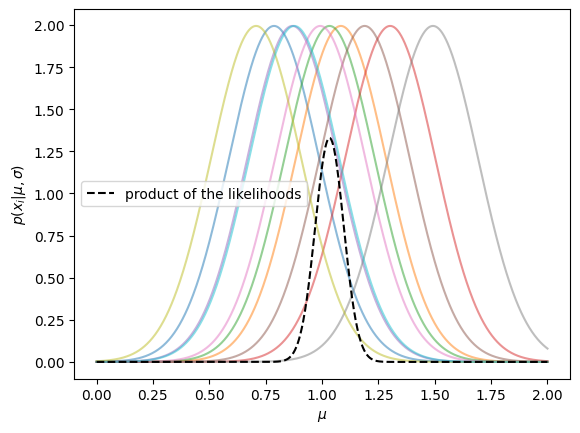

In [3]:
# Plot the likelihoods
for i in range (len(x_i)):
    plt.plot(asse_x, prob[i], alpha=0.5)

# Plot the total likelihood
tot = np.prod(prob, axis=0)
plt.plot(asse_x, tot, ls='--', c='black', label='product of the likelihoods')

plt.xlabel(r'$\mu$')
plt.ylabel(r'$p(x_i|\mu,\sigma)$')
plt.legend()
plt.show()

- Just read off the maximum likelihood solution (checkout `np.argsort`) 
- Compare it with the MLE estimator derived above

We saw that for homoscedastic gaussians (same $\sigma$), the MLE is the mean of the sample.

In [4]:
# To find the index where the total likelihood is maximum
ordinato = np.argsort(tot)
max_     = ordinato[len(ordinato)-1]
# Compute the mean as MLE
media    = np.sum(x_i)/N

print('The MLE estimator (mean) is %.4f' %media,'\nThe maximum likelihood solution is %.4f' %asse_x[max_])

The MLE estimator (mean) is 1.0332 
The maximum likelihood solution is 1.0330


### Part 2

Let's check this with a quick and dirty calculation on our quasar measurements. Implement the following:
- do a rough $2^\mathrm{nd}$ order differentation of our log-likelihood function with `np.diff`, 


In [5]:
fisher =np.diff(np.log(tot), n=2)[0]

- divide through by our $\Delta \theta^2$ to get the correct normalization, <br>

In [6]:
fisher /= np.diff(asse_x, n=1)[0]**2

- multiply by $-1$,

In [7]:
fisher *= -1

- then take the (inverse) square root.

In [8]:
fisher = 1/np.sqrt(fisher)

- Compare with the Fisher matrix error derived above <br>
$\sigma_{\mu} = \frac{\sigma}{\sqrt{N}}$

In [9]:
sigma_mu = sigma / (N)**0.5

In [10]:
print('Fisher matrix error = %.4f' %fisher)
print('Uncertainty of the sample mean = %.4f' %sigma_mu)

Fisher matrix error = 0.0632
Uncertainty of the sample mean = 0.0632


- Plot a Gaussian at the measured $\mu$ with this error as the scale to see if it matches the numerical likelihood distribution. (The normalization won't be captured, you can rescale it as you like to check it agrees) 

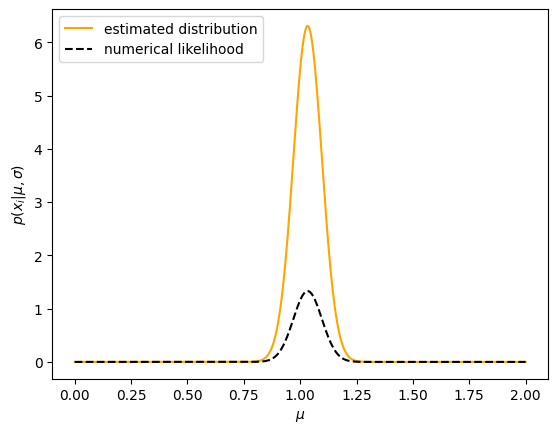

In [11]:
# Gaussian with my estimators
gauss = norm(loc=media, scale=sigma_mu)

# Plot
plt.plot(asse_x, gauss.pdf(asse_x), c='orange', label='estimated distribution')
plt.plot(asse_x, tot, ls='--', c='black', label='numerical likelihood')
plt.xlabel(r'$\mu$')
plt.ylabel(r'$p(x_i|\mu,\sigma)$')
plt.legend(loc='upper left')
plt.show()

### Part 3
Let's make our model more realistic. Our **N** measurements were taken in different nights, where the sky behaved differently (i.e. errors are heteroscedastic). Let's assume that each measurment has a $\sigma_i$ that is normally distributed with mean $0.2$ and standard deviation $0.05$.

- Generalize the code above for this case

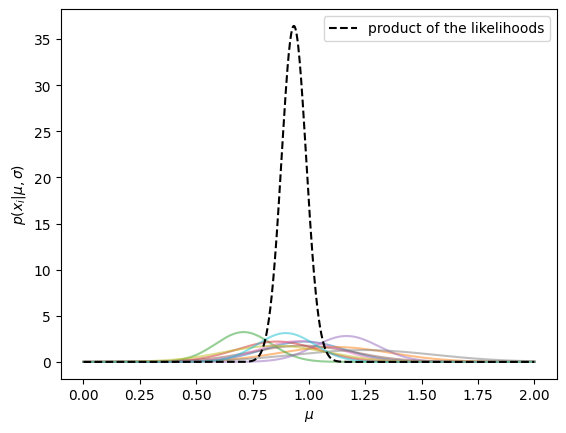

In [12]:
# Parameters of the gaussian distribution
mu    = 1
sigma = np.random.normal(loc=0.2, scale=0.05, size=N)
# Create the gaussians
pos_x   = []
gauss_h = []
for idx, sig in enumerate(sigma):
    
    pos_x.append(np.random.normal(mu, sig, 1)[0])
    gauss_h.append(norm.pdf(asse_x, pos_x[idx], sig))

    plt.plot(asse_x, gauss_h[idx], alpha=0.5)

# Plot the total likelihood
tot_3 = np.prod(gauss_h, axis=0)
plt.plot(asse_x, tot_3, ls='--', c='black', label='product of the likelihoods')

plt.xlabel(r'$\mu$')
plt.ylabel(r'$p(x_i|\mu,\sigma)$')
plt.legend()
plt.show()

If the Gaussians are heteroscedastics, then the MLE is
$$\hat \mu = \frac{\sum_i^N (x_i/\sigma_i^2)}{\sum_i^N (1/\sigma_i^2)},$$

In [13]:
# To find the index where the total likelihood is maximum
ordinato_3 = np.argsort(tot_3)
max_3     = ordinato[len(ordinato_3)-1]

# Compute the mean as MLE
media_3    = np.sum(pos_x/sigma**2) / np.sum(1/sigma**2)

print('The MLE estimator (mean) is %.4f' %media,'\nThe maximum likelihood solution is %.4f' %asse_x[max_3])

The MLE estimator (mean) is 1.0332 
The maximum likelihood solution is 1.0330


with uncertainty
$$\sigma_{\mu} = \left( \sum_{i=1}^N \frac{1}{\sigma_i^2}\right)^{-1/2}.$$

In [14]:
# Compute the error given by the fisher matrix
fisher_3 =  np.diff(np.log(tot_3), n=2)[0]
fisher_3 /= np.diff(asse_x, n=1)[0]**2
fisher_3 *= -1
fisher_3 =  1/np.sqrt(fisher_3)

# Compute the uncertainty numerically
sigma_mu_3    = (np.sum(1/sigma**2))**(-0.5)

print('Fisher matrix error = %.4f' %fisher_3)
print('Uncertainty of the sample mean = %.4f' %sigma_mu_3)

Fisher matrix error = 0.0546
Uncertainty of the sample mean = 0.0546


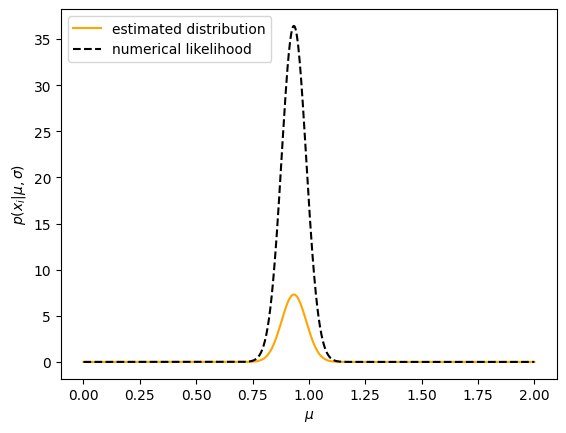

In [15]:
# Gaussian with my estimators
gauss_3 = norm(loc=media_3, scale=sigma_mu_3)

# Plot
plt.plot(asse_x, gauss_3.pdf(asse_x), c='orange', label='estimated distribution')
plt.plot(asse_x, tot_3, ls='--', c='black', label='numerical likelihood')
plt.xlabel(r'$\mu$')
plt.ylabel(r'$p(x_i|\mu,\sigma)$')
plt.legend(loc='upper left')
plt.show()